In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The dataset at hand provides a comprehensive overview of global video game sales and reviews, encompassing critical information such as the game title, platform, release year, genre, publisher, and sales figures across different regions. The dataset is structured with key metrics like North America, Europe, Japan, Rest of World, and Global sales, alongside a review score for each game.

In [12]:
import pandas as pd
import matplotlib as plt
import numpy as np

df = pd.read_csv('data/Video Games Sales.csv')
df.tail()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00
1906,1906,1907,WWE SmackDown vs. Raw 2011,X360,2010.0,Fighting,THQ,0.42,0.32,0.00,0.09,0.83,82.00


Handling missing values is an important step in data preprocessing. First we check the missing values (NaN) of the data.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64


As we can see we have 29 missing values in Year column and 2 in Publisher column. And now we will remove them to improve the performance of our model

In [8]:
df = df.dropna(subset = ['Year', 'Publisher'])
df.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

We removed the missing values and after this step we can proceed with the analysis using the cleaned data

**Exploring the data**

Let's explore the data and create some visualizations to gain insights.

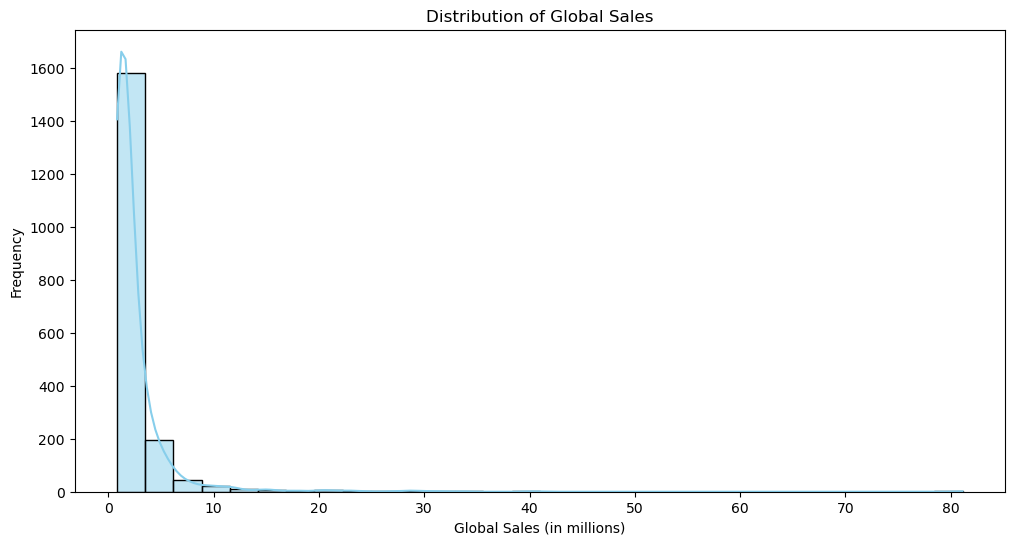

In [9]:
# Global Sales Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Global'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Iván\AppData\Local\Temp\ipykernel_56536\736254294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Global', data=df, palette='viridis')


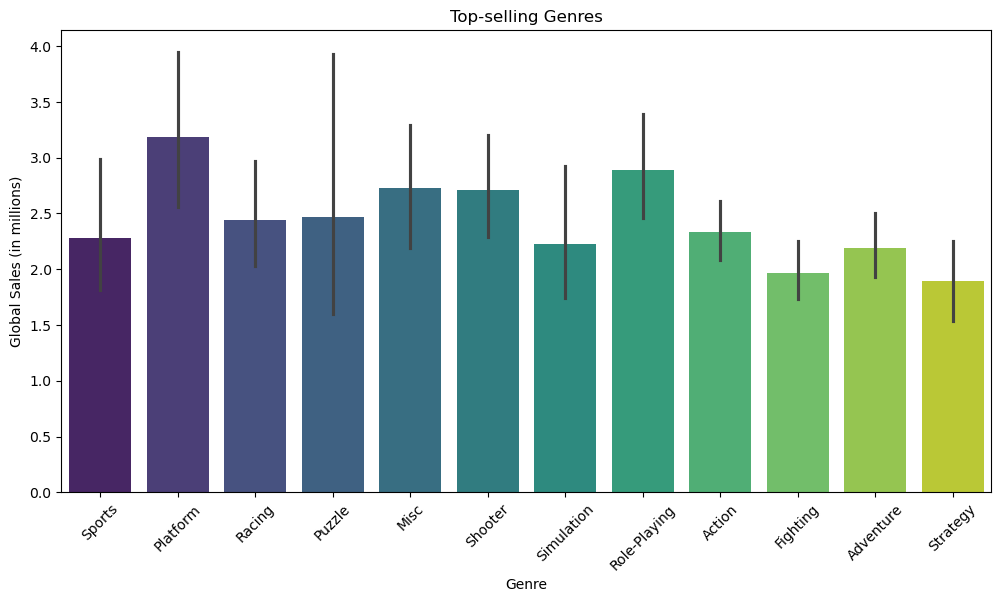

In [10]:
# Top-selling Genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global', data=df, palette='viridis')
plt.title('Top-selling Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Iván\AppData\Local\Temp\ipykernel_56536\2207026217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Global', data=df, palette='muted')


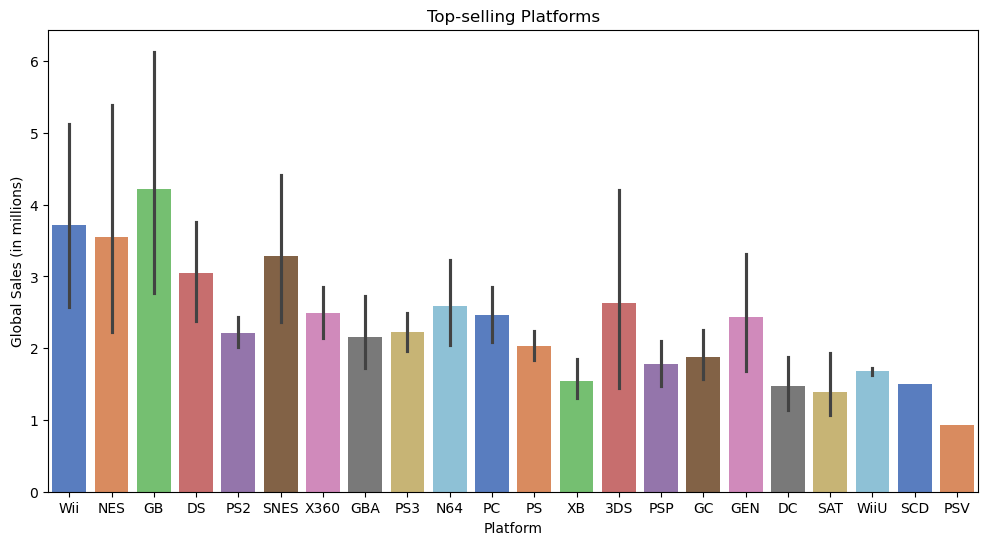

In [11]:
# Top-selling Platforms
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global', data=df, palette='muted')
plt.title('Top-selling Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

These visualizations will provide insights into the distribution of sales, popular genres, and platforms, as well as the relationship between review scores and sales. Adjust the visualizations based on your specific questions and hypotheses.